In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/DataScienceNotes/Assignments/13-XGBM & LGBM/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# checking the null values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# checking null values as nan
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

data not contain any null values as nan

In [8]:
# checking the zeros that are plced as null in numerical columun 
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

data set is having zero values but medical measurments like above features are bilogically
imposible and should be treted as missing value
##### columns that doesn't have to be zeros are 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'

<Figure size 1500x1000 with 0 Axes>

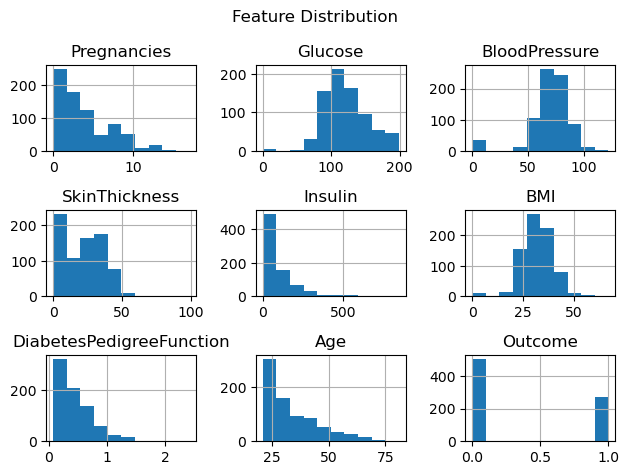

In [9]:
# plot the histogram to find the feature skewnees
plt.figure(figsize = (15, 10))
data.hist()
plt.suptitle("Feature Distribution")
plt.tight_layout()
plt.show()

##### some featrures show significant skewnees 

<Figure size 1200x1000 with 0 Axes>

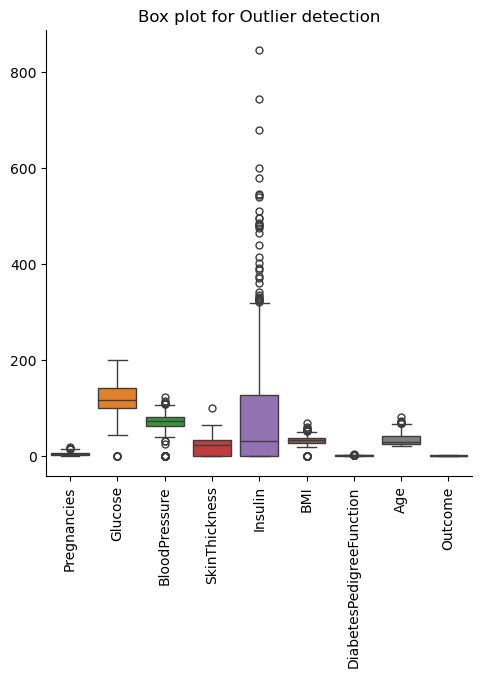

In [10]:
# finding the outliers 
plt.figure(figsize=(12, 10))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.title("Box plot for Outlier detection")
plt.show()

##### insulin is majorly having the outliers

In [11]:
# replace the value zero with nan
col_with_zero =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[col_with_zero] = data[col_with_zero].replace(0, np.nan)

In [12]:
# now getting the null values
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# impute missing values using median
for col in col_with_zero:
    data[col].fillna(data[col].median(), inplace=True)

# meadin is robust to outliers and skewed distribution

In [14]:
# spliting features and target 
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [15]:
# scaling the features using standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# split the data as Training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [17]:
# !pip install xgboost
# !pip install lightgbm

In [18]:
# model building
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [19]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
# evaluate model on training data
from sklearn.metrics import classification_report, confusion_matrix
yhat_train = xgb_model.predict(X_train)
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       375
           1       0.96      0.88      0.92       201

    accuracy                           0.94       576
   macro avg       0.95      0.93      0.94       576
weighted avg       0.94      0.94      0.94       576



In [21]:
# evaluate model on testing data
yhat_test = xgb_model.predict(X_test)
xgb_matrics=classification_report(y_test,yhat_test)
print(xgb_matrics)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       125
           1       0.64      0.57      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192



In [22]:
# LightGBM model
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 201, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=4, random_state=42)

In [23]:
# evaluate model on training data
yhat_train_lgbm = lgbm_model.predict(X_train)
print(classification_report(y_train, yhat_train_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       375
           1       0.95      0.92      0.93       201

    accuracy                           0.95       576
   macro avg       0.95      0.95      0.95       576
weighted avg       0.95      0.95      0.95       576



In [24]:
# Evluate model on testing data
yhat_test_lgbm = lgbm_model.predict(X_test) 

In [25]:
lgbm_matrics=classification_report(y_test, yhat_test_lgbm)
print(lgbm_matrics)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       125
           1       0.63      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [26]:
# evaluate all the parameters sepratly so that making comparison easy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(y_test, yhat_test):
    return {
        "Accuracy": accuracy_score(y_test, yhat_test),
        "Precision": precision_score(y_test, yhat_test),
        "Recall": recall_score(y_test, yhat_test),
        "F1 Score": f1_score(y_test, yhat_test)
    }

In [27]:
# making data frame for each boosting model to make comaparison 
xgb_metrics = evaluate_model(y_test, yhat_test)
lgbm_metrics = evaluate_model(y_test, yhat_test_lgbm)

comparison_df = pd.DataFrame([xgb_metrics, lgbm_metrics],
                             index=["XGBoost", "LightGBM"])
comparison_df


,Accuracy,Precision,Recall,F1 Score
XGBoost,0.739583,0.644068,0.567164,0.603175
LightGBM,0.739583,0.634921,0.597015,0.615385


In [28]:
# compare mauvally
print(classification_report(y_test, yhat_test))
print(classification_report(y_test, yhat_test_lgbm))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       125
           1       0.64      0.57      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       125
           1       0.63      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [29]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
parm_grid = {
    'n_estimators': [50, 100,250],
    'max_depth':[4,6,8,12],
    'learning_rate': [0.1, 0.01],
    'subsample':[0.6,0.8],
    'colsample_bytree': [0.6,1.0]
}

In [30]:
grd_xgb = GridSearchCV(xgb_model, parm_grid, cv=3, scoring='accuracy')
grd_xgb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [50, 100, 250],
                         'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [31]:
grd_xgb.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 50,
 'subsample': 0.6}

In [32]:
grd_lgbm = GridSearchCV(lgbm_model, parm_grid, cv=3, scoring='accuracy')
grd_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 134, number of negative: 250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=3, estimator=LGBMClassifier(max_depth=4, random_state=42),
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [50, 100, 250],
                         'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [33]:
# finding the best parameters 
grd_lgbm.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 50,
 'subsample': 0.6}

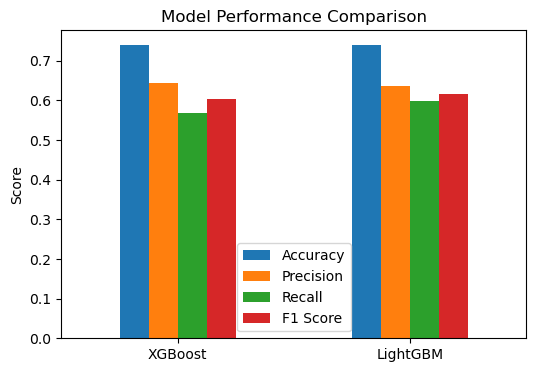

In [34]:
# visualization of the both XGB and LGBM 
comparison_df.plot(kind="bar", figsize=(6, 4))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

Both LightGBM and XGBoost are powerful ensemble methods for diabetes prediction.

LightGBM slightly outperformed XGBoost in overall F1-score.

XGBoost showed strong recall, making it suitable when minimizing false negatives.

LightGBM trained faster and handled feature interactions efficiently.

Both models handled non-linearity well.